### Imports

In [1]:
from sympy import zeros, symbols
from sympy import eye, Matrix
import sympy.physics.mechanics as me
from sympy import expand
from sympy.parsing.sympy_parser import parse_expr
from sympy.physics.mechanics import Body, PinJoint, PrismaticJoint, JointsMethod, inertia
from sympy.physics.mechanics import dynamicsymbols
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, outer
from sympy.physics.mechanics import ReferenceFrame, Point, RigidBody
from sympy.physics.mechanics import kinetic_energy, potential_energy, Point, Particle

import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

smp.init_printing(use_latex='mathjax')

In [2]:
!pip install control
import control
from sympy import Poly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 6.5 MB/s eta 0:00:00


### Setting up frames and points

In [3]:
q1, q2, q3, q4,  u1, u2, u3, u4, x_n1, x_n2, x_01, x_02 = dynamicsymbols('q1 q2 q3 q4 u1 u2 u3 u4 x_n1 x_n2 x_01 x_02')
M1, M2, k1, k2, d, d1, w1, d2, d3, w2, g, e, izz1, izz2, c1, c2, t = symbols('M1 M2 k1 k2 d d1 w1 d2 d3 w2 g e izz1 izz2 c1 c2 t')
T1, T2, T3, T4 = symbols('T1 T2 T3 T4')

In [4]:
gamma, alpha1, alpha2, beta1, beta2, omega1, omega2 = dynamicsymbols('gamma, alpha1, alpha2, beta1, beta2, omega1, omega2')

N = ReferenceFrame('N') # this is the global frame
N_a = ReferenceFrame('N_a') # this is the  frame of suspension point
A = ReferenceFrame('A') # this is the frame of the body
B = ReferenceFrame('B')

A.orient_axis(N, 0, N.z) # Initially A and N are parallel
B.orient_axis(N, 0, N.z) # Initially B and N are parallel
N_a.orient_axis(N, 0, N.z) # Initially N and N_a are parallel

In [5]:
O = Point('O')
P = Point('P')
P1 = Point('P1')
P2 = Point('P2')
X1 = Point('X1')
B1 = Point('B1')
B2 = Point('B2')
X2 = Point('X2')
C1 = Point('C1')
C2 = Point('C2')
D1 = Point('D1')
D2 = Point('D2')


X1a = Point('X1a')
X2a = Point('X2a')
B1a = Point('B1a')
B2a = Point('B2a')
C1a = Point('C1a')
C2a = Point('C2a')
D1a = Point('D1a')
D2a = Point('D2a')

In [6]:
def pos_vectors(point1, point2, frame):

    pos_vec = point1.pos_from(point2).express(frame)

    return pos_vec

In [7]:
def position_points(configuration=None):

  if configuration=='suspension_point':
    print("Running for suspension point motion")

    P.set_pos(O, q1*N.x)
    X1.set_pos(P, -q2*N.y)

    # P1 and P2 are points on the cieling
    # P1.set_pos(O, (q1-w1)*N_a.x)
    # P2.set_pos(O, (q1+w1)*N_a.x)

    P1.set_pos(P, (-w1)*N_a.x + d*N_a.y)
    P2.set_pos(P, (+w1)*N_a.x + d*N_a.y)

    ## B1 and B2 are attachement points on the body1 connecting to P1 and P2
    B1.set_pos(X1, -w1*A.x + d1*A.y)
    B2.set_pos(X1, w1*A.x + d1*A.y)

    ## C1 and C2 are points on body1 connecting to body 2
    C1.set_pos(X1, -w2*A.x - d2*A.y )
    C2.set_pos(X1, w2*A.x - d2*A.y)

    # COM of Body2
    #X2.set_pos(P, -(q2 + e)*N.y)
    X2.set_pos(O, q3*N.x -q4*N.y)

    ## D1 on body2 connects to C1 on body1 and D2 on body2 connects to C2 on body1
    D1.set_pos(X2, -w2*B.x + d3*B.y)
    D2.set_pos(X2, w2*B.x + d3*B.y)

  else:

    P.set_pos(O, q1*N.x)
    X1.set_pos(P, -q2*N.y)

    # P1 and P2 are points on the cieling
    P1.set_pos(O, (q1-w1)*N.x)
    P2.set_pos(O, (q1+w1)*N.x)

    ## B1 and B2 are attachement points on the body1 connecting to P1 and P2
    B1.set_pos(X1, -w1*A.x + d1*A.y)
    B2.set_pos(X1, w1*A.x + d1*A.y)


    ## C1 and C2 are points on body1 connecting to body 2
    C1.set_pos(X1, -w2*A.x - d2*A.y )
    C2.set_pos(X1, w2*A.x - d2*A.y)

    # COM of Body2
    X2.set_pos(O, q3*N.x -q4*N.y)

    ## D1 on body2 connects to C1 on body1 and D2 on body2 connects to C2 on body1
    D1.set_pos(X2, -w2*B.x + d3*B.y)
    D2.set_pos(X2, w2*B.x + d3*B.y)



  global b1p1_a1, b2p2_a1, b1p1_b1, b2p2_b1, b1p1_n1, b2p2_n1
  global d1c1_a1, d2c2_a1, d1c1_b1, d2c2_b1, d1c1_n1, d2c2_n1

  b1p1_a1 = pos_vectors(B1, P1, A)
  b2p2_a1 = pos_vectors(B2, P2, A)
  b1p1_b1 = pos_vectors(B1, P1, B)
  b2p2_b1 = pos_vectors(B2, P2, B)
  b1p1_n1 = pos_vectors(B1, P1, N)
  b2p2_n1 = pos_vectors(B2, P2, N)


  d1c1_a1 = pos_vectors(D1, C1, A)
  d2c2_a1 = pos_vectors(D2, C2, A)
  d1c1_b1 = pos_vectors(D1, C1, B)
  d2c2_b1 = pos_vectors(D2, C2, B)
  d1c1_n1 = pos_vectors(D1, C1, N)
  d2c2_n1 = pos_vectors(D2, C2, N)

  return

### Initial setup has been defined, below functions will disturb the system

In [43]:
def move_points(configuration=None):

  if configuration=='suspension_point':
    print("Running for suspension point motion")

    ### Rotating the frame
    N_a.orient_axis(N, gamma, N.z)


  else:
    ### Translation of blocks

    X1a.set_pos(O, -q2*N.y + (x_n1+q1)*N.x)
    B1a.set_pos(X1a, -w1*A.x + d1*A.y)
    B2a.set_pos(X1a, w1*A.x + d1*A.y)
    C1a.set_pos(X1a, -w2*A.x - d2*A.y)
    C2a.set_pos(X1a, w2*A.x - d2*A.y)

    X2a.set_pos(O,  (x_n2+q3)*N.x -(q4)*N.y)
    D1a.set_pos(X2a, -w2*B.x + d3*B.y)
    D2a.set_pos(X2a, w2*B.x + d3*B.y)


    global b1ap1_a2, b2ap2_a2, b1ap1_b2, b2ap2_b2, b1ap1_n2, b2ap2_n2, d1ac1a_a2
    global d2ac2a_a2, d1ac1a_b2, d1ac1a_b2, d2ac2a_b2, d1ac1a_n2, d2ac2a_n2

    b1ap1_a2 = pos_vectors(B1a, P1, A)
    b2ap2_a2 = pos_vectors(B2a, P2, A)
    b1ap1_b2 = pos_vectors(B1a, P1, B)
    b2ap2_b2 = pos_vectors(B2a, P2, B)
    b1ap1_n2 = pos_vectors(B1a, P1, N)
    b2ap2_n2 = pos_vectors(B2a, P2, N)

    d1ac1a_a2 = pos_vectors(D1a, C1a, A)
    d2ac2a_a2 = pos_vectors(D2a, C2a, A)
    d1ac1a_b2 = pos_vectors(D1a, C1a, B)
    d2ac2a_b2 = pos_vectors(D2a, C2a, B)
    d1ac1a_n2 = pos_vectors(D1a, C1a, N)
    d2ac2a_n2 = pos_vectors(D2a, C2a, N)

  return

In [44]:
def rotate_blocks(configuration=None):


  global b1p1_a3, b2p2_a3, b1p1_b3, b2p2_b3, b1p1_n3, b2p2_n3
  global d1c1_a3, d2c2_a3, d1c1_b3, d2c2_b3, d1c1_n3, d2c2_n3
  global d1c1_a4, d2c2_a4, d1c1_b4, d2c2_b4, d1c1_n4, d2c2_n4

  global b1ap1_a3, b2ap2_a3, b1ap1_b3, b2ap2_b3, b1ap1_n3, b2ap2_n3
  global d1ac1a_a3, d2ac2a_a3, d1ac1a_b3, d2ac2a_b3, d1ac1a_n3, d2ac2a_n3
  global d1ac1a_a4, d2ac2a_a4, d1ac1a_b4, d2ac2a_b4, d1ac1a_n4, d2ac2a_n4

  A.orient_axis(N, alpha1-beta1, N.z)

  if configuration=='suspension_point':
    print("Running for suspension point motion")

    b1p1_a3 = pos_vectors(B1, P1, A)
    b2p2_a3 = pos_vectors(B2, P2, A)

    b1p1_b3 = pos_vectors(B1, P1, B)
    b2p2_b3 = pos_vectors(B2, P2, B)

    b1p1_n3 = pos_vectors(B1, P1, N)
    b2p2_n3 = pos_vectors(B2, P2, N)

    d1c1_a3 = pos_vectors(D1, C1, A)
    d2c2_a3 = pos_vectors(D2, C2, A)

    d1c1_b3 = pos_vectors(D1, C1, B)
    d2c2_b3 = pos_vectors(D2, C2, B)

    d1c1_n3 = pos_vectors(D1, C1, N)
    d2c2_n3 = pos_vectors(D2, C2, N)

  else:

    b1ap1_a3 = pos_vectors(B1a, P1, A)
    b2ap2_a3 = pos_vectors(B2a, P2, A)

    b1ap1_b3 = pos_vectors(B1a, P1, B)
    b2ap2_b3 = pos_vectors(B2a, P2, B)

    b1ap1_n3 = pos_vectors(B1a, P1, N)
    b2ap2_n3 = pos_vectors(B2a, P2, N)


    d1ac1a_a3 = pos_vectors(D1a, C1a, A)
    d2ac2a_a3 = pos_vectors(D2a, C2a, A)

    d1ac1a_b3 = pos_vectors(D1a, C1a, B)
    d2ac2a_b3 = pos_vectors(D2a, C2a, B)

    d1ac1a_n3 = pos_vectors(D1a, C1a, N)
    d2ac2a_n3 = pos_vectors(D2a, C2a, N)




  B.orient_axis(N, alpha2-beta2, N.z)

  if configuration=='suspension_point':

    d1c1_a4 = D1.pos_from(C1).express(A)
    d2c2_a4 = D2.pos_from(C2).express(A)

    d1c1_b4 = D1.pos_from(C1).express(B)
    d2c2_b4 = D2.pos_from(C2).express(B)

    d1c1_n4 = D1.pos_from(C1).express(N)
    d2c2_n4 = D2.pos_from(C2).express(N)

  else:

    d1ac1a_a4 = D1a.pos_from(C1a).express(A)
    d2ac2a_a4 = D2a.pos_from(C2a).express(A)

    d1ac1a_b4 = D1a.pos_from(C1a).express(B)
    d2ac2a_b4 = D2a.pos_from(C2a).express(B)

    d1ac1a_n4 = D1a.pos_from(C1a).express(N)
    d2ac2a_n4 = D2a.pos_from(C2a).express(N)


  return

### Tensions

In [45]:
def tensions(configuration=None):

  global dirT1, dirT2, dirT3, dirT4, T1, T2, T3, T4, delta_l1, delta_l2
  global delta_l3, delta_l4



  delta_l1, delta_l2, delta_l3, delta_l4 = symbols('delta_l1 delta_l2 delta_l3 delta_l4')

  T1 = smp.Rational(1,2)*(M1 + M2)*g + k1*delta_l1
  T2 = smp.Rational(1,2)*(M1 + M2)*g - k1*delta_l2
  T3 = smp.Rational(1,2)*(M2*g) - k2*delta_l3
  T4 = smp.Rational(1,2)*(M2*g) + k2*delta_l4

  if configuration=='suspension_point':
    print("Running for suspension point motion")



    dirT1 = -b1p1_n3/b1p1_n3.magnitude()
    dirT2 = -b2p2_n3/b2p2_n3.magnitude()
    dirT3 = -d1c1_n4/d1c1_n4.magnitude()
    dirT4 = -d2c2_n4/d2c2_n4.magnitude()

  else:
    #directions
    dirT1 = -b1ap1_a3/b1ap1_a3.magnitude()
    dirT2 = -b2ap2_a3/b2ap2_a3.magnitude()
    dirT3 = -d1ac1a_b4/d1ac1a_b4.magnitude()
    dirT4 = -d2ac2a_b4/d2ac2a_b4.magnitude()





  return

### Creating body and applying the forces

In [46]:
def create_blocks(configuration=None):

  global block1, block2

  if configuration=='suspension_point':
    print("Running for suspension point motion")
    ### Creating the body in frame A with Mass M1 and center of mass X1a
    IB = inertia(A, 0, 0, izz1)
    block1 = Body('C1', X1, mass=M1, frame=A, central_inertia=IB)
    block1.frame.set_ang_vel(N, omega1*N.z)
    X1.set_vel(N, u1*N.x + u2*N.y)

    ### Creating the body in frame B with Mass M2 and center of mass X2a
    IB2 = inertia(B, 0, 0, izz2)
    block2 = Body('C2', X2, mass=M2, frame=B, central_inertia=IB2)
    block2.frame.set_ang_vel(N, omega2*N.z)


    block1.apply_force(T1*dirT1, point=B1)
    block1.apply_force(T2*dirT2, point=B2)

    block1.apply_force(-T3*dirT3, point=C1)
    block1.apply_force(-T4*dirT4, point=C2)

    block2.apply_force(T3*dirT3, point=D1)
    block2.apply_force(T4*dirT4, point=D2)

    block1.apply_force(-(M1+M2)*g*N.y.express(A), point=X1)
    block2.apply_force(-(M2)*g*N.y.express(B), point=X2)



  else:

    ### Creating the body in frame A with Mass M1 and center of mass X1a
    IB = inertia(A, 0, 0, izz1)
    block1 = Body('C1', X1a, mass=M1, frame=A, central_inertia=IB)
    block1.frame.set_ang_vel(N, omega1*N.z)
    X1a.set_vel(N, u1*N.x + u2*N.y)

    ### Creating the body in frame B with Mass M2 and center of mass X2a
    IB2 = inertia(B, 0, 0, izz2)
    block2 = Body('C2', X2a, mass=M2, frame=B, central_inertia=IB2)
    block2.frame.set_ang_vel(N, omega2*N.z)
    X2a.set_vel(N, u3*N.x + u4*N.y)


    block1.apply_force(T1*dirT1, point=B1a)
    block1.apply_force(T2*dirT2, point=B2a)
    block1.apply_force(-T3*dirT3, point=C1a)
    block1.apply_force(-T4*dirT4, point=C2a)
    block2.apply_force(T3*dirT3, point=D1a)
    block2.apply_force(T4*dirT4, point=D2a)

    block1.apply_force(-(M1 + M2)*g*N.y.express(A), point=X1a)
    block2.apply_force(-(M2)*g*N.y.express(B), point=X2a)


    return

### Solving kanes equations

In [47]:
def solve_kane(configuration=None):

  if configuration=='suspension_point':
    print("Running for suspension point motion")

    kane = me.KanesMethod(N, q_ind=[q1, q2, alpha1, q3, q4, alpha2],
                      u_ind = [u1, u2, omega1, u3, u4, omega2],
                      kd_eqs=[u1-q1.diff(t), u2 + q2.diff(t), omega1 - alpha1.diff(t), u3 - q3.diff(t), u4 + q4.diff(t),  omega2 - alpha2.diff(t)])

    kaneeq = kane.kanes_equations([block1, block2], [block1.loads[0], block1.loads[1], block1.loads[2], block1.loads[3], block1.loads[4],
                                                 block2.loads[0], block2.loads[1], block2.loads[2]])


  else:

    kane = me.KanesMethod(N, q_ind=[x_n1, q2, alpha1, x_n2, q4, alpha2],
                      u_ind = [u1, u2, omega1, u3, u4, omega2],
                      kd_eqs=[u1-x_n1.diff(t), u2 + q2.diff(t), omega1 - alpha1.diff(t), u3 - x_n2.diff(t), u4 + q4.diff(t),  omega2 - alpha2.diff(t)])
    kaneeq = kane.kanes_equations([block1, block2], [block1.loads[0], block1.loads[1], block1.loads[2], block1.loads[3], block1.loads[4],
                                                 block2.loads[0], block2.loads[1], block2.loads[2]])

  return kane, kaneeq

### Linearzing

In [48]:
def linearize_(kane=None,configuration=None):

  if configuration=='suspension_point':
    print("Running for suspension point motion")
    kanel = kane.to_linearizer()
    A_mat, B_mat = kanel.linearize(A_and_B=True, op_point={alpha1:beta1, alpha2:beta2, gamma:0, q3:q1})

  else:
     kanel = kane.to_linearizer()
     A_mat, B_mat = kanel.linearize(A_and_B=True, op_point={alpha1:beta1, alpha2:beta2, x_n1:0, x_n2:0})

  return A_mat, B_mat


In [49]:
def simplify_A_B(configuration=None, A_mat=None, B_mat=None):

  global l1, l2

  l1, l2 = symbols('l1 l2', positive=True)

  if configuration=='suspension_point':
    print("Running for suspension point motion")

    A_mat = A_mat.subs({-d + d1 - q2:-l1, d2 + d3 + q2 - q4: -l2}).subs({-d + d1 - q2:-l1, expand((d2 + d3 + q2 - q4)**2): l2**2}) #d2 + d3 - e:-l2})
    A_mat.simplify()

    A_mat_ = A_mat.subs({delta_l1:delta_l2, delta_l3:delta_l4})
    A_mat_.simplify()

    A_mat_a = A_mat.subs({delta_l1:0, delta_l2:0, delta_l3:0, delta_l4:0})
    A_mat_a.simplify()

    B_mat = B_mat.subs({-d + d1 - q2:-l1, d2 + d3 + q2 - q4: -l2}).subs({-d + d1 - q2:-l1, expand((d2 + d3 + q2 - q4)**2): l2**2})
    B_mat.simplify()

    B_mat_ = B_mat.subs({delta_l1:delta_l2, delta_l3:delta_l4})
    B_mat_.simplify()

    B_mat_a = B_mat.subs({delta_l1:0, delta_l2:0, delta_l3:0, delta_l4:0})
    B_mat_a.simplify()

  else:

    A_mat = A_mat.subs({d1 - q2:-l1, d2 + d3 + q2 - q4: -l2})
    A_mat.simplify()

    A_mat_ = A_mat.subs({delta_l1:delta_l2, delta_l3:delta_l4})
    A_mat_.simplify()

    A_mat_a = A_mat.subs({delta_l1:0, delta_l2:0, delta_l3:0, delta_l4:0, q1:q3})
    A_mat_a.simplify()

    B_mat = B_mat.subs({d1 - q2:-l1, d2 + d3 + q2 - q4: -l2})
    B_mat.simplify()

    B_mat_ = B_mat.subs({delta_l1:delta_l2, delta_l3:delta_l4})
    B_mat_.simplify()

    B_mat_a = B_mat.subs({delta_l1:0, delta_l2:0, delta_l3:0, delta_l4:0, q1:q3})
    B_mat_a.simplify()

  return A_mat, A_mat_, A_mat_a, B_mat, B_mat_, B_mat_a

### Functions to check the correctness of A and B matrices

In [50]:
def check_b_mat(component_kane=0,input_component=x_01, component_b_mat=6, input_ind=2):

  kanes_val = kaneeq[0][component_kane].diff(input_component).subs({alpha1:beta1, alpha2:beta2, gamma:0, x_n1:0, x_n2:0, q1:q3}).subs({delta_l1:delta_l2, delta_l3:delta_l4,
                                                                                         d1 - q2:-l1,d2 + d3 + q2 - q4: -l2 }).simplify()
  B_mat_val = B_mat[component_b_mat, input_ind].subs({delta_l1:delta_l2, delta_l3:delta_l4,d1 - q2:-l1, d2 + d3 + q2 - q4: -l2, q1:q3}).simplify()
  mass_torque_dict = {0:M1, 1:M1, 2:izz1, 3:M2, 4:M2, 5:izz2}

  diff = (kanes_val/mass_torque_dict[component_kane] - B_mat_val).simplify()

  return diff, kanes_val, B_mat_val

In [51]:
#check_b_mat(0, beta1, 6, 0) # Fx on Top mass

In [52]:
#check_b_mat(0, beta2, 6, 1) # Fx on Top mass

In [53]:
#check_b_mat(0, q1, 6, 2) # Fx on Top mass

In [54]:
#check_b_mat(0, q3, 6, 3) # Fx on Top mass

In [55]:
#check_b_mat(2, beta1, 8, 0) # Torque on Top mass

In [56]:
def check_A_mat(component_kane=0,input_component=x_n1, component_a_mat=6, input_ind=0):

  kanes_val = kaneeq[0][component_kane].diff(input_component).subs({alpha1:beta1, alpha2:beta2, gamma:0, x_n1:0, x_n2:0, q1:q3}).subs({delta_l1:delta_l2, delta_l3:delta_l4,d1 - q2:-l1,
                                                                                                                       d2 + d3 + q2 - q4:-l2}).simplify()
  A_mat_val = A_mat[component_a_mat, input_ind].subs({delta_l1:delta_l2, delta_l3:delta_l4,d1 - q2:-l1, d2 + d3 + q2 - q4:-l2, q1:q3}).simplify()
  force_dict = {0:'horizontal F Mass 1', 1:'Vertical Force Mass 1',
                2:'Torque Mass 1', 3:'Horizontal Force Mass 2',
                4:'Vertical Force Mass 2', 5:'Torque Mass 2'}


  mass_torque_dict = {0:M1, 1:M1, 2:izz1, 3:M2, 4:M2, 5:izz2}

  diff = (kanes_val/mass_torque_dict[component_kane] - A_mat_val).simplify()



  return diff, kanes_val, A_mat_val

In [57]:
#check_A_mat(0, x_n1, 6, 0) # Fx on top mass

In [58]:
#check_A_mat(0, x_n2, 6, 3) # Fx on top mass

In [59]:
#check_A_mat(0, alpha1, 6, 2) # Fx on top mass

In [60]:
#check_A_mat(0, alpha2, 6, 5) # Fx on top mass

### Transfer function matrix

In [61]:
def get_tf_matrix(A=None, B=None):

  s = symbols('s')
  si = s*eye(A.shape[0])

  sia = si - A
  sia.simplify()
  sia_ = sia.subs({q2 - q4 + d2 + l2:-d3, -d2 - q2 + q4: l2 + d3})

  print("Getting the determinant")
  sia_det_ = sia_.det()
  sia_adj_ = sia_.adjugate()

  sia_inv = sia_adj_/sia_det_

  sia_inv_B_ = sia_inv*B


  return sia_inv_B_

### Obtaining transfer functions

In [62]:
def get_tfs(sia_B_matrix=None, configuration=None):

  if configuration=='suspension_point':
    print("Running for suspoint motion")


    tf_pt_lt = sia_B_matrix[0,0] # Beta1 to q1
    tf_pb_lt = sia_B_matrix[0,1] # Beta2 to q1
    tf_psus_lt = sia_B_matrix[0,2] # Gamma to q1

    tf_pt_pt = sia_B_matrix[2,0] # Beta1 to alpha1
    tf_pb_pt = sia_B_matrix[2,1] # Beta2 to alpha1
    tf_psus_pt = sia_B_matrix[2,2] # Gamma to alpha1

    tf_pt_lb = sia_B_matrix[3,0] # Beta1 to q3
    tf_pb_lb = sia_B_matrix[3,1] # Beta2 to q3
    tf_psus_lb = sia_B_matrix[3,2] # Gamma to q3

    tf_pt_pb = sia_B_matrix[5,0] # Beta1 to alpha2
    tf_pb_pb = sia_B_matrix[5,1] # Beta2 to alpha2
    tf_psus_pb = sia_B_matrix[5,2] # Gamma to alpha2
    #print(tf_pt_lt)

    tf_dict = {'pt_lt':tf_pt_lt, 'pb_lt':tf_pb_lt, 'psus_lt':tf_psus_lt,
               'pt_pt':tf_pt_pt, 'pb_pt': tf_pb_pt, 'psus_pt':tf_psus_pt,
               'pt_lb': tf_pt_lb, 'pb_lb': tf_pb_lb, 'psus_lb':tf_psus_lb,
               'pt_pb': tf_pt_pb, 'pb_pb': tf_pb_pb, 'psus_pb': tf_psus_pb}




  else:

    tf_pt_lt = sia_B_matrix[0,0].simplify()  # P top to L top
    tf_pb_lt = sia_B_matrix[0,1].simplify()  # P bottom to L top
    tf_lt_lt = sia_B_matrix[0,2].simplify()  # L top to L top
    tf_lb_lt = sia_B_matrix[0,3].simplify()  # L bottom to L top

    tf_pt_pt = sia_B_matrix[2,0].simplify()  # P top to P top
    tf_pb_pt = sia_B_matrix[2,1].simplify()  # P bottom to P top
    tf_lt_pt = sia_B_matrix[2,2].simplify()  # L top to P top
    tf_lb_pt = sia_B_matrix[2,3].simplify()  # L bottom to P top

    tf_pt_lb = sia_B_matrix[3,0].simplify()  # P top to L bottom
    tf_pb_lb = sia_B_matrix[3,1].simplify()  # P bottom to L bottom
    tf_lt_lb = sia_B_matrix[3,2].simplify()  # L top to L bottom
    tf_lb_lb = sia_B_matrix[3,3].simplify()  # L bottom to L bottom

    tf_pt_pb = sia_B_matrix[5,0].simplify()  # P top to P bottom
    tf_pb_pb = sia_B_matrix[5,1].simplify()  # P bottom to P bottom
    tf_lt_pb = sia_B_matrix[5,2].simplify()  # L top to P bottom
    tf_lb_pb = sia_B_matrix[5,3].simplify()  # L bottom to P bottom

    tf_dict = {'pt_lt': tf_pt_lt, 'pb_lt': tf_pb_lt, 'lt_lt': tf_lt_lt, 'lb_lt':tf_lb_lt,
               'pt_pt': tf_pt_pt, 'pb_pt': tf_pb_pt, 'lt_pt': tf_lt_pt, 'lb_pt': tf_lb_pt,
               'pt_lb': tf_pt_lb, 'pb_lb': tf_pb_lb, 'lt_lb': tf_lt_lb, 'lb_lb': tf_lb_lb,
               'pt_pb': tf_pt_pb, 'pb_pb': tf_pb_pb, 'lt_pb': tf_lt_pb, 'lb_pb': tf_lb_pb}



  return tf_dict

### Plotting transfer functions

In [63]:
def plot_tfs(motion='pt_lb', tf_dict=None, damping=False, configuration=None):

  tf_key = motion

  tf_ = tf_dict[tf_key]
  #print(tf_)

  motion_dict = {'pt':'pitch top', 'pb':'pitch bottom', 'lt':'length top',
                 'lb':'length bottom', 'psus':'pitch suspension point'}


  if configuration == 'suspension_point':
    tf_val = tf_.evalf(subs={M1:2.88, M2:2.662, d1:0.02275, d:0.011, d2:0.015, d3:0.001, l1:0.311, l2:0.3, q2:l1 -d + d1, q4:l1 -d + d1 + d2 + l2 + d3,
                            g:9.8, izz1:0.00981984, izz2:0.00499125}) #e:d2 + l2 + d3

    tf_val = tf_val.evalf(subs={d2:0.015, d3:0.001, izz1:0.00981984, izz2:0.00499125})

    print("Generating transfer function for {}  to  {}".format(motion_dict[motion.split('_')[0]], motion_dict[motion.split('_')[1]]))

  else:

    tf_val = tf_.evalf(subs={M1:2.88, M2:2.662, d1:0.02275,  d2:0.015, d3:0.001, l1:0.3, l2:0.3, q2:l1 + d1, q4: l1 + d1 + d2 + l2 + d3,
                            g:9.8, izz1:0.00981984, izz2:0.00499125}) #e:d2 + l2 + d3

    tf_val = tf_val.evalf(subs={d2:0.015, d3:0.001, izz1:0.00981984, izz2:0.00499125})

    print("Generating transfer function for {}  to  {}".format(motion_dict[motion.split('_')[0]], motion_dict[motion.split('_')[1]]))





  num_coeffs, den_coeffs = Poly(tf_val.as_numer_denom()[0]).all_coeffs(), Poly(tf_val.as_numer_denom()[-1]).all_coeffs()
  if damping:
    den_coeffs[-2] = 1e-5
  print(den_coeffs)


  s = symbols('s')
  tf_val_ = Poly(num_coeffs, s)/Poly(den_coeffs, s)


  H = control.tf(np.array(num_coeffs, dtype=float), np.array(den_coeffs, dtype=float))
  #mag, phase, omega = control.bode(H, omega=freq, dB=False, deg=True, Hz=True, wrap_phase)
  control.bode_plot(H, omega=freq, dB=False, deg=True, Hz=True, wrap_phase=True)

  return tf_val_.simplify()

### Combining all the functions

In [64]:
def generate_tfs(configuration=None):


  if configuration=='suspension_point':


    position_points(configuration='suspension_point')
    move_points(configuration='suspension_point')
    rotate_blocks(configuration='suspension_point')
    tensions(configuration='suspension_point')
    create_blocks(configuration='suspension_point')
    kane, kaneeq = solve_kane(configuration='suspension_point')
    A_mat, B_mat = linearize_(kane=kane, configuration='suspension_point')

    A_mat, A_mat_, A_mat_a, B_mat, B_mat_, B_mat_a = simplify_A_B(A_mat=A_mat, B_mat=B_mat, configuration='suspension_point')

    sia_inv_B_a = get_tf_matrix(A=A_mat_a, B=B_mat_a)

    tfs_sia_B = get_tfs(sia_B_matrix=sia_inv_B_a, configuration='suspension_point')


  else:
    position_points()
    move_points()
    rotate_blocks()
    tensions()
    create_blocks()
    kane, kaneeq = solve_kane()
    A_mat, B_mat = linearize_(kane=kane)

    A_mat, A_mat_, A_mat_a, B_mat, B_mat_, B_mat_a = simplify_A_B(A_mat=A_mat, B_mat=B_mat)

    sia_inv_B_a = get_tf_matrix(A=A_mat_a, B=B_mat_a)

    tfs_sia_B = get_tfs(sia_B_matrix=sia_inv_B_a)


  return tfs_sia_B, sia_inv_B_a


In [27]:
# ### I can convert this matrix to a pandas dataframe and save as a csv file
# import pandas as pd
# df = pd.DataFrame([[sia_inv_B_a[i,j] for i in range(12)] for j in range(4)]).T

In [44]:
# df.head()

In [46]:
#!mkdir suspension_files

In [45]:
# df.to_csv('/content/suspension_files/sia_inv_B_a.csv', index=None)

In [ ]:
## Now this file can be read in a dataframe and converted back to matrix form
# df_ = pd.read_csv('/content/suspension_files/sia_inv_B_a.csv')
# sia_inv_B_a_df = Matrix([[parse_expr(df_.iloc[i,j]) for i in range(12)] for j in range(4)])

In [46]:
# ### Getting the transfer functions from the inverse matrix
# tfs_sia_inv_B_a = get_tfs(sia_B_matrix=sia_inv_B_a)

In [47]:
# ### Plotting the transfer functions
# freq = np.geomspace(0.1, 100, 500)
# plot_tfs(motion='pt_lt', tf_dict=tfs_sia_inv_B_a)

In [48]:
# plot_tfs(motion='pb_pt', tf_dict=tfs_sia_inv_B_a)

### Generating transfer functions for suspension point motion

In [65]:
tfs_sia_inv_B_a_sus = generate_tfs(configuration='suspension_point')[0]

Running for suspension point motion
Running for suspension point motion
Running for suspension point motion
Running for suspension point motion
Running for suspension point motion
Running for suspension point motion


/usr/local/lib/python3.10/dist-packages/sympy/physics/vector/point.py:574: UserWarning: Velocity automatically calculated based on point D1 but it is also possible from points(s):[X1]. Velocities from these points are not necessarily the same. This may cause errors in your calculations.
  warn('Velocity automatically calculated based on point ' +
/usr/local/lib/python3.10/dist-packages/sympy/physics/vector/point.py:574: UserWarning: Velocity automatically calculated based on point D1 but it is also possible from points(s):[D2, X1]. Velocities from these points are not necessarily the same. This may cause errors in your calculations.
  warn('Velocity automatically calculated based on point ' +


Running for suspension point motion
Running for suspension point motion
Getting the determinant
Running for suspoint motion


In [66]:
tfs_sia_inv_B_a_sus.keys()

dict_keys(['pt_lt', 'pb_lt', 'psus_lt', 'pt_pt', 'pb_pt', 'psus_pt', 'pt_lb', 'pb_lb', 'psus_lb', 'pt_pb', 'pb_pb', 'psus_pb'])

In [71]:
tfs_sia_inv_B_a_sus['pb_lt']

                      ⎛                                                       
                      ⎜                                                       
                      ⎜               ⎛                               ⎛ 2   g⋅
                      ⎜               ⎜              3   M₂⋅d₂⋅d₃⋅g⋅s⋅⎜s  - ──
                      ⎜               ⎜  M₂⋅d₂⋅d₃⋅g⋅s                 ⎝       
                      ⎜  M₂⋅d₂⋅d₃⋅g⋅s⋅⎜- ───────────── + ─────────────────────
                      ⎜               ⎜     izz₂⋅l₂                           
                      ⎜               ⎝                                       
M₁⋅M₂⋅d₂⋅d₃⋅g⋅izz₂⋅l₁⋅⎜- ─────────────────────────────────────────────────────
                      ⎜                                                       
                      ⎝                                                       
──────────────────────────────────────────────────────────────────────────────
                                                    

### Generating transfer function for blocks pitch and translation

In [67]:
tfs_sia_inv_B_a_ = generate_tfs()[0]

Getting the determinant


In [68]:
tfs_sia_inv_B_a_.keys()

dict_keys(['pt_lt', 'pb_lt', 'lt_lt', 'lb_lt', 'pt_pt', 'pb_pt', 'lt_pt', 'lb_pt', 'pt_lb', 'pb_lb', 'lt_lb', 'lb_lb', 'pt_pb', 'pb_pb', 'lt_pb', 'lb_pb'])

### Plotting the transfer functions

Generating transfer function for pitch top  to  length top
[1.27042412428800e-5, 0.0, 0.00391512613083158, 0.0, 0.324908038970388, 0.0, 5.91713052067208, 0.0, 22.5899064785837]


                 2 ⎛                       4                         2        
                s ⋅⎝- 1.24142037093847e-5⋅s  - 0.000658691983684966⋅s  - 0.003
──────────────────────────────────────────────────────────────────────────────
                   8                        6                      4          
1.270424124288e-5⋅s  + 0.00391512613083158⋅s  + 0.324908038970388⋅s  + 5.91713

              ⎞                
10197727816971⎠                
───────────────────────────────
           2                   
052067208⋅s  + 22.5899064785837

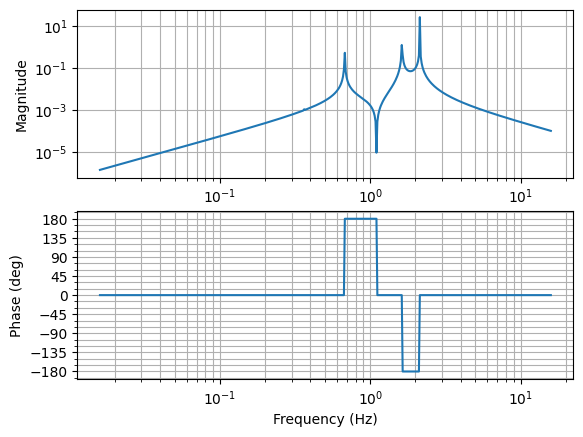

In [69]:
### Plotting the transfer functions
freq = np.geomspace(0.1, 100, 500)
plot_tfs(motion='pt_lt', tf_dict=tfs_sia_inv_B_a_)

Generating transfer function for pitch suspension point  to  pitch bottom
[1.73450570533855e-10, 0.0, 8.49826593819766e-8, 0.0, 1.47221673644457e-5, 0.0, 0.00107679577862225, 0.0, 0.0317732027058588, 0.0, 0.251929889500634, 0.0, 0.591860372700889, 0.0, 0.0, 0.0, 0.0, 0.0]


                    10                        8                         7     
1.8139031553482e-9⋅s   + 7.78304171927887e-7⋅s  + 7.13950568683591e-25⋅s  + 0.
──────────────────────────────────────────────────────────────────────────────
                                       2 ⎛                      12            
                                      s ⋅⎝1.73450570533855e-10⋅s   + 8.4982659

                    6                         5                        4      
000104358596624819⋅s  + 1.74901177341944e-22⋅s  + 0.00425761212438039⋅s  + 8.8
──────────────────────────────────────────────────────────────────────────────
            10                        8                        6              
3819766e-8⋅s   + 1.47221673644457e-5⋅s  + 0.00107679577862225⋅s  + 0.031773202

                   3                       2                                  
7606239300739e-21⋅s  + 0.0195070085384564⋅s  + 4.17051712796347e-20⋅s + 5.1247
──────────────────────────────────────────────────

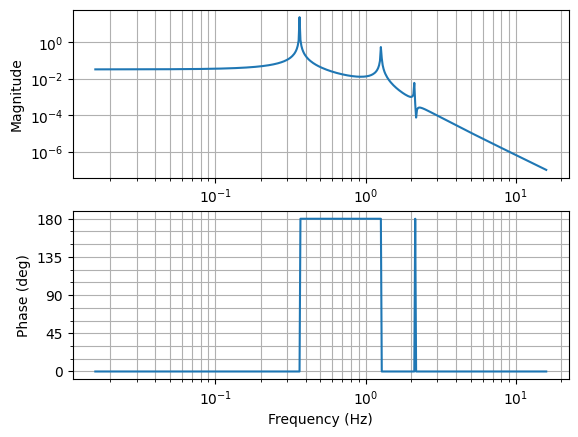

In [70]:
### Plotting the transfer functions
freq = np.geomspace(0.1, 100, 500)
plot_tfs(motion='psus_pb', tf_dict=tfs_sia_inv_B_a_sus, configuration='suspension_point')

In [ ]:
# with tf.device(device_name):
#   import time
#   tic = time.time()
#   sia_det = sia.det()
#   sia_adj = sia.adjugate()
#   tac = time.time()
#   print(tac-tic)


#   # sia_det_ = sia_.det()
#   # sia_adj_ = sia_.adjugate()

#   #sia_det_a = sia_a.det()
#   #sia_adj_a = sia_a.adjugate()

#   sia_inv = sia_adj/sia_det
#   # sia_inv_ = sia_adj_/sia_det_
#   #sia_inv_a = sia_adj_a/sia_det_a

In [36]:
# sia_inv_B = sia_inv*B_mat_
# #sia_inv_B_ = sia_inv_*B_mat_
# #sia_inv_B_a = sia_inv_a*B_mat_a

In [37]:
# #sia_inv_B.shape
# #sia_inv_B_.shape
# sia_inv_B_a.shape

In [49]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if len(device_name) > 0:
#     print("Found GPU at: {}".format(device_name))
# else:
#     device_name = "/device:CPU:0"
#     print("No GPU, using {}.".format(device_name))